# Pandas 3
## September 20th, 2022
### Overview: Pandas grouping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [15]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    #read in file
    coll = pd.read_csv('college.csv',index_col='Unnamed: 0')
    
    #group by private boolean, separate public and private school groups
    cc = coll.groupby('Private')
    Pub = cc.get_group(('No'))
    Priv= cc.get_group(('Yes'))
    
    #s:f ratios
    pub_sfr =  Pub['S.F.Ratio'].mean()
    priv_sfr = Priv['S.F.Ratio'].mean()
    
    # PUBLIC GREATER THAN PRIVATE
    vals1 = Pub['S.F.Ratio'].describe().values
    
    #percentage students from top 10% of high school class
    pub_perc10  = Pub['Top10perc'].mean()
    priv_perc10 = Priv['Top10perc'].mean()
    
    # PRIVATE GREATER THAN PUBLIC
    vals2 = Priv['Top10perc'].describe().values
    
    #percentage students from top 25% of high school class
    pub_perc25  = Pub['Top25perc'].mean()
    priv_perc25 = Priv['Top25perc'].mean()
    
    # PRIVATE GREATER THAN PUBLIC
    vals3 = Priv['Top25perc'].describe().values
    
    return (vals1,vals2,vals3)

In [16]:
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

In [49]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    plt.rcParams["figure.figsize"] = (20,10) #make plots big
    #read in file
    coll = pd.read_csv('college.csv',index_col='Unnamed: 0')
    
    #group by private boolean, separate public and private school groups
    cc = coll.groupby('Private')
    
    #barh plot of applications, acceptance, and enrollment
    cc[['Apps','Accept','Enroll']].mean().plot(kind='barh',xerr=cc.std(),title='Private vs Public: Applicants, Acceptance, and Enrollment, $\mu\pm\sigma$')
    plt.xlabel('Number of Students')
    
    #box plot of room and board prices
    coll.boxplot(['Room.Board'],by='Private',grid=False)
    plt.ylabel('Cost')
    plt.title('Range of Room and Board Costs')

/home/zane/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


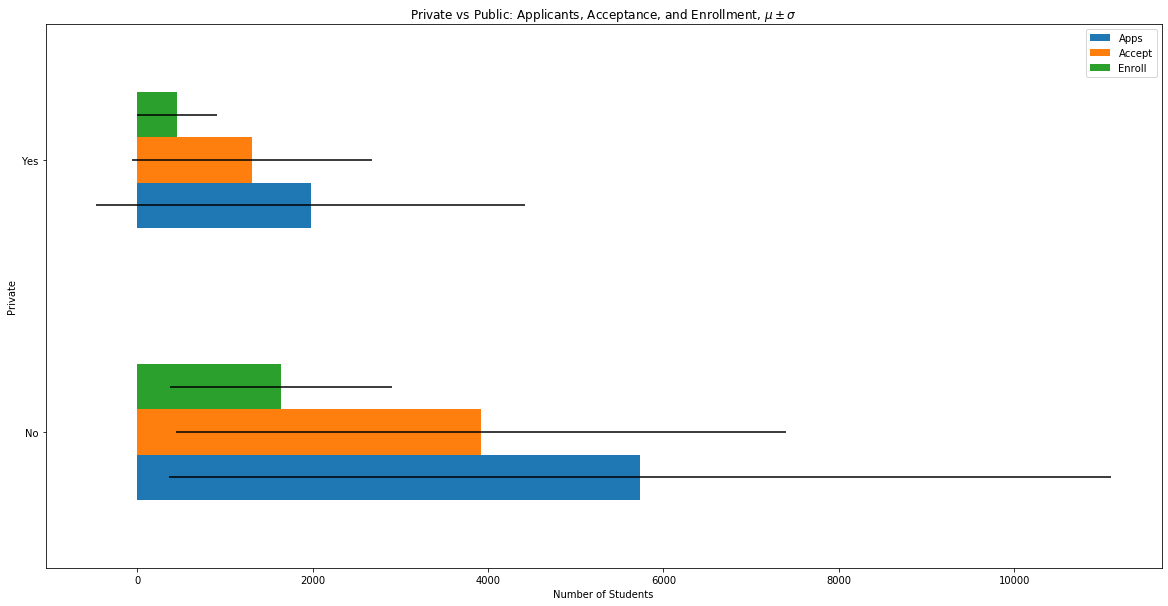

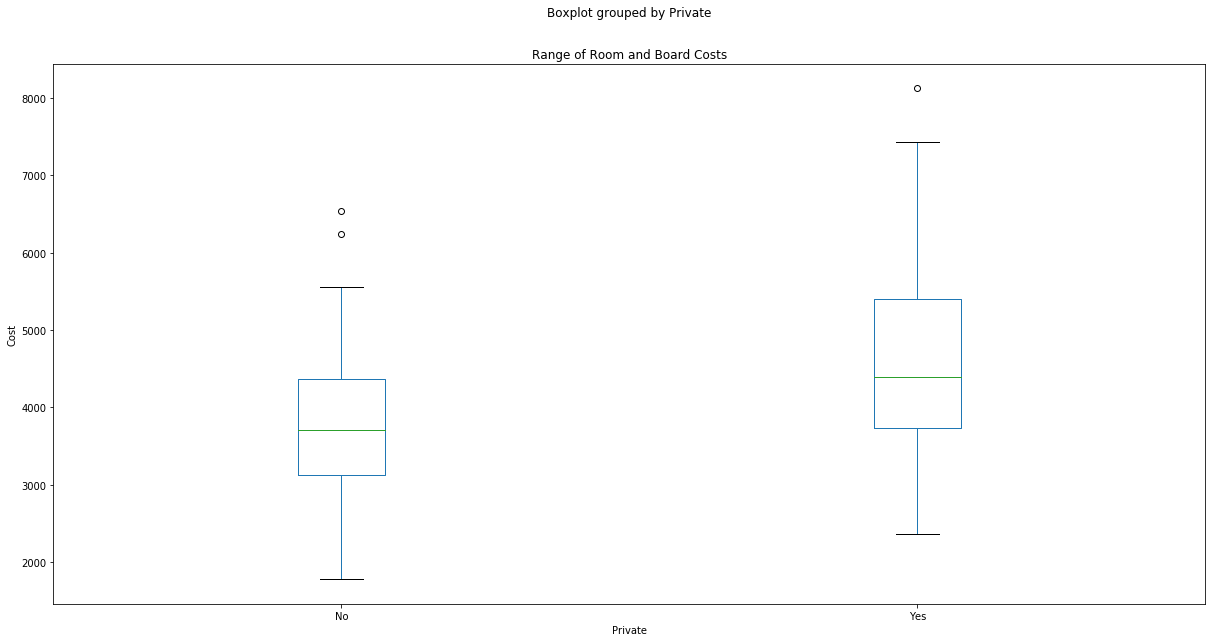

In [50]:
prob2()

# Problem 3

In [66]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    #read in file
    ohio = pd.read_csv('Ohio_1999.csv')
    
    #
    total = ohio.pivot_table(values='Usual Weekly Earnings',index='Race',columns='Sex',aggfunc='sum')
    #highest is (1,1)
    ans1 = (1,1)
    
    cumulative = ohio.pivot_table(values='Usual Hours Worked',index='Race',columns='Sex',aggfunc='sum')
    #highest is (3,2)
    ans2 = (3,2)
    
    average = ohio.pivot_table(values='Usual Hours Worked',index='Race',columns='Sex',aggfunc='mean')
    #highest is (3,1)
    ans3 = (3,1)
    
    return ans1, ans2, ans3

In [119]:
prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [129]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    #read in file
    ohio = pd.read_csv('Ohio_1999.csv')
    
    #partition education degree, find 
    cut_me = pd.cut(ohio['Educational Attainment'],[0,38,42,46])
    ans1 = cut_me.value_counts().idxmax()
    
    #cut age into 6 quantiles
    cut_me2 = pd.qcut(ohio['Age'],6)
    ans2 = ohio.pivot_table(values='Usual Hours Worked',columns=cut_me2).sum(axis=0).idxmax()
    
    #pivot on yearly salary with index being age and columns being degrees
    table = ohio.pivot_table(values='Yearly Salary',index=[cut_me2],columns=[cut_me])
    #get which age and degree index gives the minimum
    ans3  = table.idxmin(axis=1).idxmin(), table.idxmin().idxmin()
    
    return ans1, ans2, ans3

In [130]:
prob4()

(Interval(38, 42, closed='right'),
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), Interval(0, 38, closed='right')))

# Problem 5

In [175]:
def prob5():
    """
    Use pivot tables and groupby objects on the data in
    College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates? Use only the data to explain why; 
           do not extrapolate.
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    #read in file
    coll = pd.read_csv('college.csv')#,index_col='Unnamed: 0')
    #group by whether school is private or not
    cc = coll.groupby('Private')
    Pub = cc.get_group(('No'))
    Priv= cc.get_group(('Yes'))
    
    #scatter plots to check for correlation
    #Pub.plot(kind='scatter',x='perc.alumni',y='Expend')
    #Priv.plot(kind='scatter',x='perc.alumni',y='Expend')
    #NO CORRELATION::: FALSE
    
    #partition grad rates
    grad_part = pd.cut(coll['Grad.Rate'], [0,20,40,60,80,100])
    #make a pivot table
    piv = coll.pivot_table(values='Unnamed: 0',index='Private',columns=grad_part,aggfunc='count')
    # PUBLIC COLLEGES HAVE GREATEST NUMBER IN (40,60] RANGE, PRIVATE IN (60,80] RANGE::: FALSE    
    
    #create a column of acceptance rate
    coll['acceptance rate'] = coll['Accept']/coll['Apps']
    
    #plot top10perc vs acceptance rate
    cc  = coll.groupby('Private')
    Pub = cc.get_group(('No'))
    Priv= cc.get_group(('Yes'))
    #ax = Pub.plot(kind='scatter', x='acceptance rate',y='Top10perc',label='Public')
    #Priv.plot(ax=ax,kind='scatter', x='acceptance rate',y='Top10perc',color='r',label='Private')
    #plt.legend()
    
    ans4 = """On average, private schools accept fewer applications than public schools. Therefore, a private school 
    will be incentivized to accept more students from the top of their high school class."""
    
    return (False,False,True,ans4)

In [176]:
prob5()

(False,
 False,
 True,
 'On average, private schools accept fewer applications than public schools. Therefore, a private school \n    will be incentivized to accept more students from the top of their high school class.')